In [5]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Minimum Variance Portfolio Backtest.

In [6]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.estimated.min_var import MinVariance
from qamsi.cov_estimators.cov_estimators import CovEstimators
from run import Dataset, initialize

In [7]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 50
ESTIMATION_WINDOW = 365

ESTIMATOR = CovEstimators.RISKFOLIO.value(estimator_type="shrunk")

In [8]:
trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=None,
    min_exposure=None,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [9]:
strategy = MinVariance(
    cov_estimator=ESTIMATOR,
    trading_config=trading_config,
    window_size=ESTIMATION_WINDOW,
)

strategy_name = ESTIMATOR.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [08:59<00:00,  1.91s/it]


StrategyStatistics:
* final_nav = 9.571823
* geom_avg_total_r = 0.126151
* geom_avg_xs_r = 0.118372
* std_xs_r = 0.145757
* min_xs_r = -0.095062
* max_xs_r = 0.096430
* skew = -0.096895
* kurtosis = 16.906382
* max_dd = -0.271534
* sharpe = 0.812117
* alpha_buy_hold = 0.048579
* tracking_error_buy_hold = 0.160863
* ir_buy_hold = 0.301989
* factor_loadings = {'low_risk': 0.6079346003006341, 'momentum': -0.09747943450819535, 'quality': 0.09675689308584576, 'size': 0.053450546235247656, 'value': -0.25215429397638167, 'spx': 0.6896674905034303}
* alpha_benchmark = 0.054124
* alpha_benchmark_pvalue = 0.013687
* tracking_error_benchmark = 0.094679
* ir_benchmark = 0.571663
* ttest_pval = 0.298376
* levene_pval = 0.000000
* timing_ability_coef = -0.031521
* timing_ability_pval = 0.071102

In [10]:
result.std_xs_r, result.sharpe

(0.1457573441413518, 0.8121166878409306)

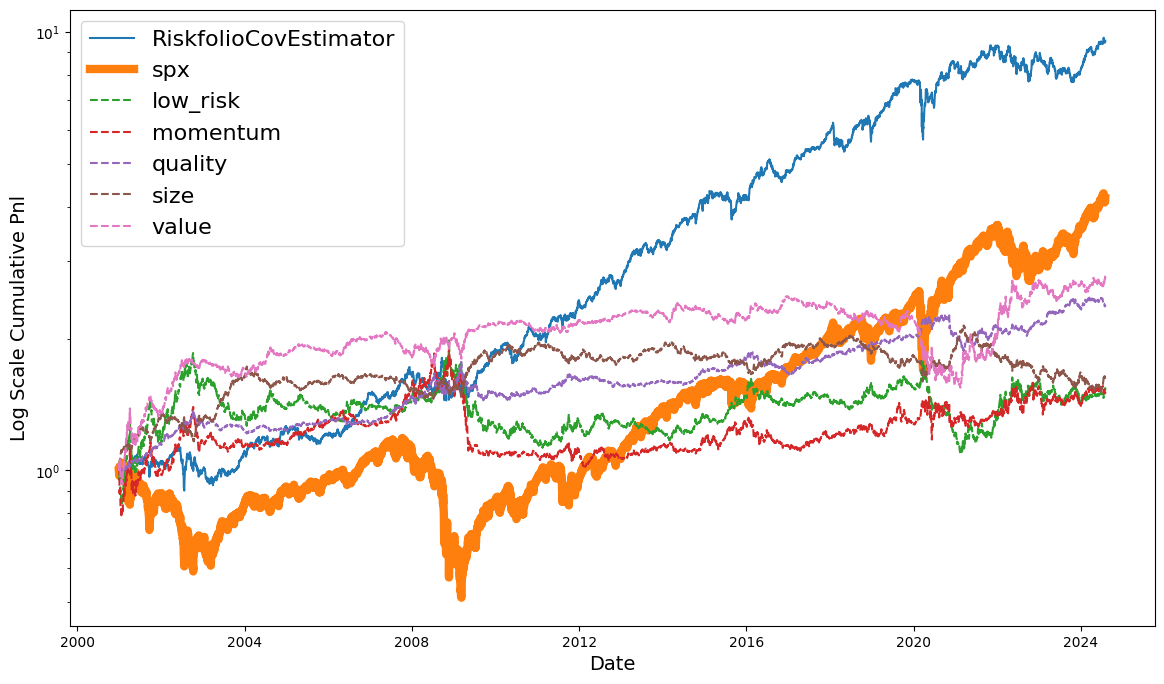

In [11]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

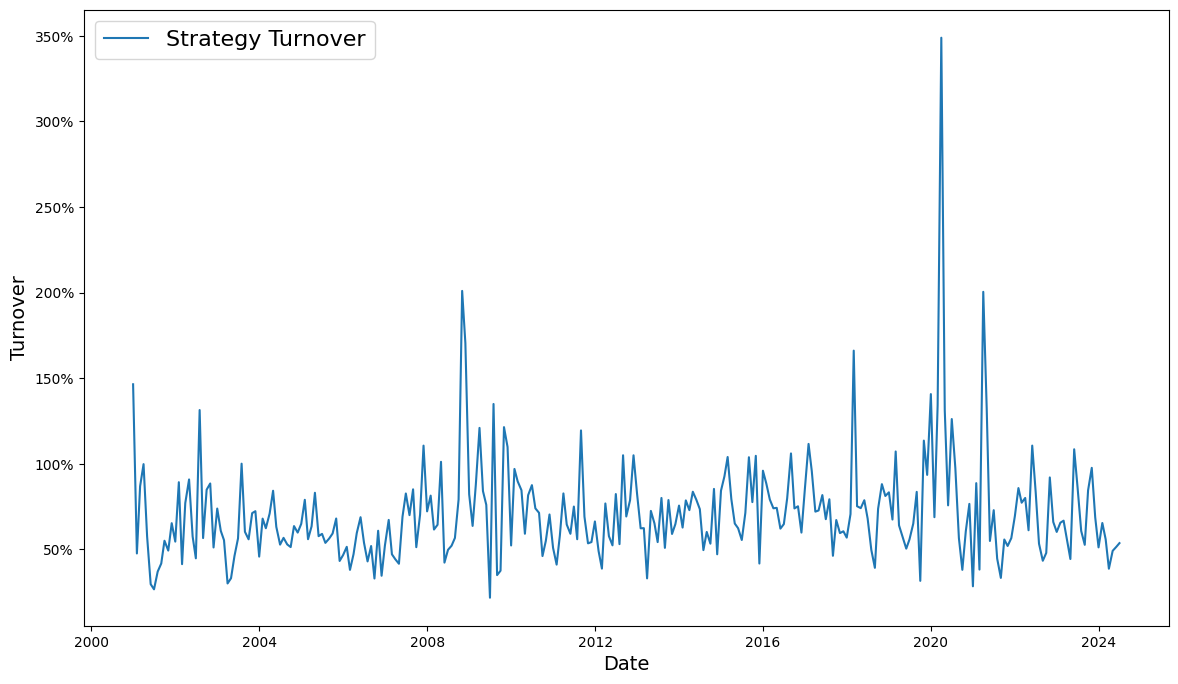

In [12]:
runner.plot_turnover()

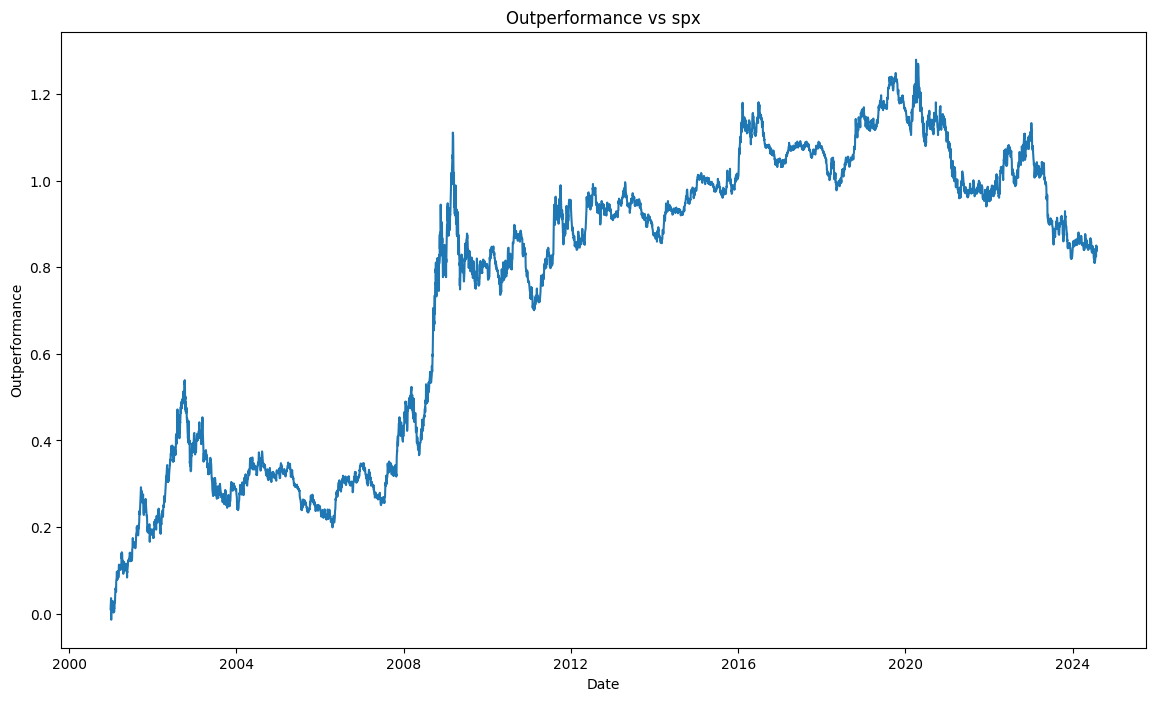

In [13]:
runner.plot_outperformance(mkt_only=True)

In [14]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")